# DESAFIO MACHINE LEARNING MANIPULAÊ

## 1. INTRODUÇÃO


**OBJETIVO:** Prever valor correto da fórmula. <br>
**MÉTRICAS UTILIZADAS:** RMSE, MAE, R-Quadrado. <br>
**DADOS:** 7121 fórmulas de medicamentos manipulados.

## 2. CARREGANDO PACOTES E IMPORTANDOS DADOS

In [ ]:
# Carregar pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importar dados
link= 'https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv'
df= pd.read_csv(link)

In [ ]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   descricao   7121 non-null   object 
 1   criado      7121 non-null   object 
 2   qtdInsumos  7121 non-null   int64  
 3   calculado   7121 non-null   float64
 4   correto     7121 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 278.3+ KB


In [ ]:
# Visualizar as cinco primeiras linhas do dataset
df.head()

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0


In [ ]:
# Visualizar as cinco últimas linhas do dataset
df.tail()

,descricao,criado,qtdInsumos,calculado,correto
7116,45 CAP | SERTRALINA CLORIDRATO 40MG; SLENDEST...,2020-07-09 17:33:11,12,188.5325,181.8
7117,120 CAP | GREENSELECT 120MG,2020-07-09 17:24:09,1,377.6529,346.6
7118,60 CAP | MAGNESIO QUELADO 30% 220MG; SELENIO ...,2020-07-09 17:23:10,11,166.2868,157.2
7119,30 CAP | VALERIANA 50MG; PASSIFLORA 500MG; C...,2020-07-09 17:22:09,3,60.1646,68.1
7120,60 CAP | ACIDO TRANEXAMICO 200MG; BIOTINA 2.5...,2020-07-09 17:14:09,2,107.0370,95.3


In [ ]:
# Estatística descritiva
df.describe()

,qtdInsumos,calculado,correto
count,7121.000000,7121.000000,7121.000000
mean,3.281842,137.089552,135.891798
std,3.194301,191.266516,189.806974
min,1.000000,30.000100,33.000000
25%,1.000000,49.786100,49.500000
50%,2.000000,87.350300,83.100000
75%,4.000000,165.167000,161.200000
max,26.000000,10364.992500,10356.000000


In [ ]:
# Checar valores NAs
df.isnull().sum()

descricao     0
criado        0
qtdInsumos    0
calculado     0
correto       0
dtype: int64

## 3. TRANSFORMANDO DADOS

In [ ]:
# Criando variável quantidade
df['quantidade'],df['descricao']= df['descricao'].str.split('|',1).str

In [ ]:
# Limpando variável quantidade
df['quantidade'],df['Tb']= df['quantidade'].str.split(' CAP',1).str

In [ ]:
# Definindo tipo das variáveis
df['quantidade']= df['quantidade'].astype(int)
df['criado']= pd.to_datetime(df['criado'])

In [ ]:
# Organizando novo dataset
df= df[['descricao','quantidade','criado','qtdInsumos','calculado','correto']]

In [ ]:
# Tratando outliers
df= df[df['calculado'] < 10000]
df= df[df['correto'] < 10000]

In [ ]:
# Visualizando as cinco primeiras linhas do dataset pós transformações
df.head()

,descricao,quantidade,criado,qtdInsumos,calculado,correto
0,BUPROPIONA CLORIDRATO 150MG,30,2020-08-05 23:19:09,1,47.5297,39.9
1,FINASTERIDA 1:10 1MG,60,2020-08-05 22:51:09,1,46.9620,43.6
2,NAC 250MG; SILIMARINA 150MG; SAME 50MG,60,2020-08-05 22:51:09,3,105.1390,111.4
3,ANASTROZOL 1:10 0.300MG,60,2020-08-05 22:51:09,1,49.0314,43.6
4,DUTASTERIDA 0.250MG; TADALAFIL 10MG,120,2020-08-05 22:49:09,2,161.8272,146.0


In [ ]:
# Checar valores NAs
df.isnull().sum()

descricao     0
quantidade    0
criado        0
qtdInsumos    0
calculado     0
correto       0
dtype: int64

## 4. ANÁLISE EXPLORATÓRIA DOS DADOS

**DICIONÁRIO DE VARIÁVEIS**

**descricao:** Descrição da fórmula (ex: zinco quelado 20mg). <br>
**criado:** Data da criação da fórmula. <br>
**qtdInsumos:** Quantidade de insumos da fórmula. <br>
**calculado:** Preço pré-calculado da fórmula. <br>
**correto:** Preço correto da fórmula.

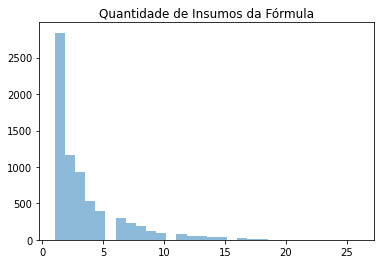

In [ ]:
# Plotar variável qtdInsumos
plt.hist(df['qtdInsumos'],bins=30,alpha=0.5)
plt.title("Quantidade de Insumos da Fórmula")
plt.show()

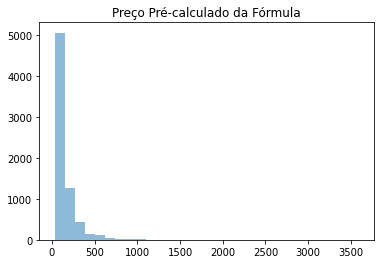

In [ ]:
# Plotar variável calculado
plt.hist(df['calculado'],bins=30,alpha=0.5)
plt.title("Preço Pré-calculado da Fórmula")
plt.show()

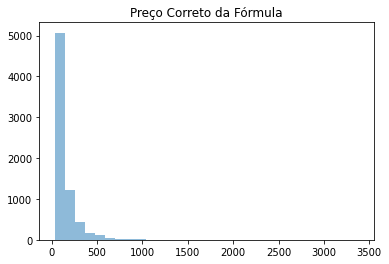

In [ ]:
# Plotar variável correto
plt.hist(df['correto'],bins=30,alpha=0.5)
plt.title("Preço Correto da Fórmula")
plt.show()

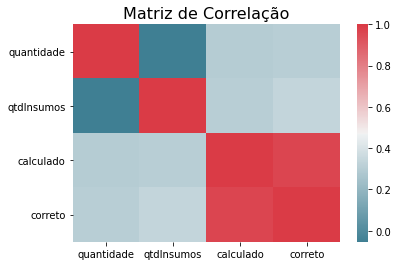

In [ ]:
# Matriz de correlação
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Matriz de Correlação", {'fontsize':16})
plt.show()

## 5. MODELOS MACHINE LEARNING

In [ ]:
# Carregando pacotes
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [ ]:
# Criando cópia dos dados
df_copy=df.copy()

In [ ]:
# Transformando variáveis criado e descrição em dummies
df_copy['criado']= pd.get_dummies(df_copy['criado'],drop_first=True)
df_copy['descricao']= pd.get_dummies(df_copy['descricao'],drop_first=True)

In [ ]:
# Ajustando X e Y
X= df_copy.drop(['correto'],axis=1)
y= df_copy['correto']

In [ ]:
# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.29,random_state=10)

In [ ]:
# Shape dados de treino
X_train.shape

(5055, 5)

In [ ]:
# Shape dados de teste
X_test.shape

(2065, 5)

In [ ]:
# Normalizando os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform (X_test)

### 5.1 LINEAR REGRESSION

In [ ]:
# Criando modelo reg 
reg= LinearRegression()
model_reg= reg.fit(X_train_scaled,y_train)

In [ ]:
# Fazendo previsões reg 
pred_reg= model_reg.predict(X_test_scaled)

In [ ]:
# Métricas modelo reg 
REGrmse= mean_squared_error(y_test,pred_reg,squared=False)
REGmae= mean_absolute_error(y_test,pred_reg)
REGr2= r2_score(y_test,pred_reg)
df_reg= pd.DataFrame.from_dict({'':'Linear Regression',
                                     'rmse':[REGrmse],
                                     'mae':[REGmae],
                                     'r2':[REGr2]})
print(df_reg)

                           rmse        mae        r2
0  Linear Regression  30.451391  12.683133  0.955159


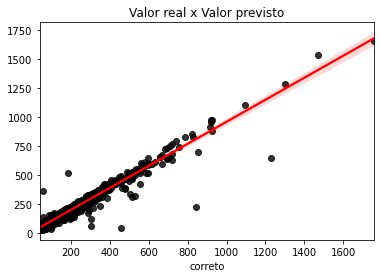

In [ ]:
# Plotando valor real x valor previsto
sns.regplot(y_test,pred_reg,scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.title("Valor real x Valor previsto")
plt.show()

### 5.2 DECISION TREE

In [ ]:
# Criando modelo decision tree
dtr= DecisionTreeRegressor()
model_tree= dtr.fit(X_train_scaled,y_train)

In [ ]:
# Fazendo previsões modelo decision tree
pred_tree= model_tree.predict(X_test_scaled)

In [ ]:
# Métricas modelo decision tree
TREErmse= mean_squared_error(y_test,pred_tree,squared=False)
TREEmae= mean_absolute_error(y_test,pred_tree)
TREEr2= r2_score(y_test,pred_tree)
df_tree= pd.DataFrame.from_dict({'':'Decision Tree',
                                     'rmse':[TREErmse],
                                     'mae':[TREEmae],
                                     'r2':[TREEr2]})
print(df_tree)

                       rmse       mae        r2
0  Decision Tree  63.152819  16.05812  0.807137


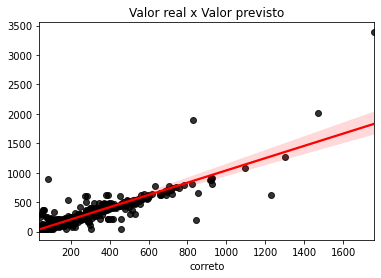

In [ ]:
# Plotando valor real x valor previsto
sns.regplot(y_test,pred_tree,scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.title("Valor real x Valor previsto")
plt.show()

### 5.3 RANDOM FOREST

In [ ]:
# Criando modelo random forest
random = RandomForestRegressor(n_estimators = 250)
model_rf= random.fit(X_train_scaled,y_train)

In [ ]:
# Fazendo previsões modelo random forest
pred_rf= model_rf.predict(X_test_scaled)

In [ ]:
# Métricas modelo random forest
RFrmse= mean_squared_error(y_test,pred_rf,squared=False)
RFmae= mean_absolute_error(y_test,pred_rf)
RFr2= r2_score(y_test,pred_rf)
df_rf= pd.DataFrame.from_dict({'':'Decision Tree',
                                     'rmse':[RFrmse],
                                     'mae':[RFmae],
                                     'r2':[RFr2]})
print(df_rf)

                       rmse        mae        r2
0  Decision Tree  35.982952  11.952832  0.937388


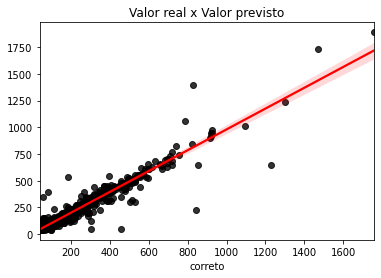

In [ ]:
# Plotando valor real x valor previsto
sns.regplot(y_test,pred_rf,scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.title("Valor real x Valor previsto")
plt.show()

### 5.4 SVM

In [ ]:
# Criando modelo SVM
svm = SVR(kernel='rbf')
model_svm= svm.fit(X_train_scaled,y_train)

In [ ]:
# Fazendo previsões modelo SVM
pred_svm= model_svm.predict(X_test_scaled)

In [ ]:
# Métricas modelo SVM
SVMrmse= mean_squared_error(y_test,pred_svm,squared=False)
SVMmae= mean_absolute_error(y_test,pred_svm)
SVMr2= r2_score(y_test,pred_svm)
df_svm= pd.DataFrame.from_dict({'':'SVM',
                                     'rmse':[SVMrmse],
                                     'mae':[SVMmae],
                                     'r2':[SVMr2]})
print(df_svm)

             rmse        mae        r2
0  SVM  95.368887  33.832031  0.560179


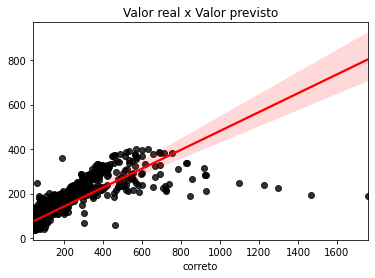

In [ ]:
# Plotando valor real x valor previsto
sns.regplot(y_test,pred_svm,scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.title("Valor real x Valor previsto")
plt.show()

### 5.5 KNN

In [ ]:
# Criando modelo knn
knn= KNeighborsRegressor()
model_knn= knn.fit(X_train,y_train)

In [ ]:
# Fazendo previsões modelo knn
pred_knn= model_knn.predict(X_test)

In [ ]:
# Métricas modelo knn
KNNrmse= mean_squared_error(y_test,pred_knn,squared=False)
KNNmae= mean_absolute_error(y_test,pred_knn)
KNNr2= r2_score(y_test,pred_knn)
df_knn= pd.DataFrame.from_dict({'':'KNN',
                                     'rmse':[KNNrmse],
                                     'mae':[KNNmae],
                                     'r2':[KNNr2]})
print(df_knn)

             rmse        mae        r2
0  KNN  34.005387  12.040866  0.944081


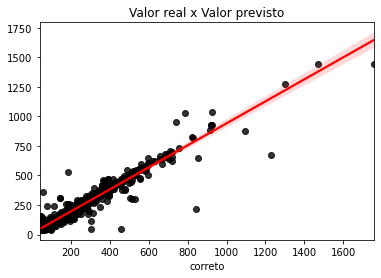

In [ ]:
# Plotando valor real x valor previsto
sns.regplot(y_test,pred_knn,scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.title("Valor real x Valor previsto")
plt.show()

### 5.6 XGBOOST

In [ ]:
# Criando modelo XGBoost
xgb= XGBRegressor()
model_xgb= knn.fit(X_train_scaled,y_train)

In [ ]:
# Fazendo previsões modelo XGBoost
pred_xgb= model_xgb.predict(X_test_scaled)

In [ ]:
# Métricas modelo XGBoost
XGBrmse= mean_squared_error(y_test,pred_xgb,squared=False)
XGBmae= mean_absolute_error(y_test,pred_xgb)
XGBr2= r2_score(y_test,pred_xgb)
df_xgb= pd.DataFrame.from_dict({'':'XGBOOST',
                                     'rmse':[XGBrmse],
                                     'mae':[XGBmae],
                                     'r2':[XGBr2]})
print(df_xgb)

                 rmse        mae        r2
0  XGBOOST  39.365093  13.819565  0.925065


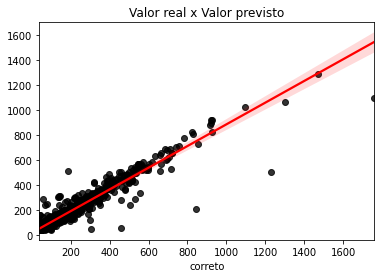

In [ ]:
# Plotando valor real x valor previsto
sns.regplot(y_test,pred_xgb,scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.title("Valor real x Valor previsto")
plt.show()

## 6. RESULTADOS

In [ ]:
# Listas modelos
algorithms=["Linear Regression","Decision Tree","Random Forest","SVM","KNN",'XGBOOST']
list_pred=[pred_reg,pred_tree,pred_rf,pred_svm,pred_knn,pred_xgb]

In [ ]:
# Construir tabela de comparação
df_comp = pd.DataFrame()
for i in list_pred:
  rmse= mean_squared_error(y_test,i,squared=False)
  mae= mean_absolute_error(y_test,i)
  r2= r2_score(y_test,i)
  temp= pd.DataFrame(
      {"RMSE":rmse,
       "MAE":mae,
       "R2":r2},index=[0])
  df_comp = pd.concat([df_comp, temp])
df_comp.insert(0,'Modelo',algorithms)

In [ ]:
# Comparando modelos
print(df_comp.sort_values('RMSE'))

              Modelo       RMSE        MAE        R2
0  Linear Regression  30.451391  12.683133  0.955159
0                KNN  34.005387  12.040866  0.944081
0      Random Forest  35.982952  11.952832  0.937388
0            XGBOOST  39.365093  13.819565  0.925065
0      Decision Tree  63.152819  16.058120  0.807137
0                SVM  95.368887  33.832031  0.560179


In [ ]:
# Salvando previsões
df_predicts=pd.DataFrame(data={'Actual': y_test,
                          'Pred_Reg': pred_reg,
                          'Pred_Tree':pred_tree,
                          'Pred_RF':pred_rf,
                          'Pred_SVM':pred_svm,
                          'Pred_KNN':pred_knn,
                          'Pred_XGB':pred_xgb})

In [ ]:
# Salvando tabelas
writer = pd.ExcelWriter('desafio.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Tabela Preço',index=False)
df_comp.to_excel(writer, sheet_name='Resultados',index=False)
df_predicts.to_excel(writer,sheet_name='Valores Preditos')
writer.save()